<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

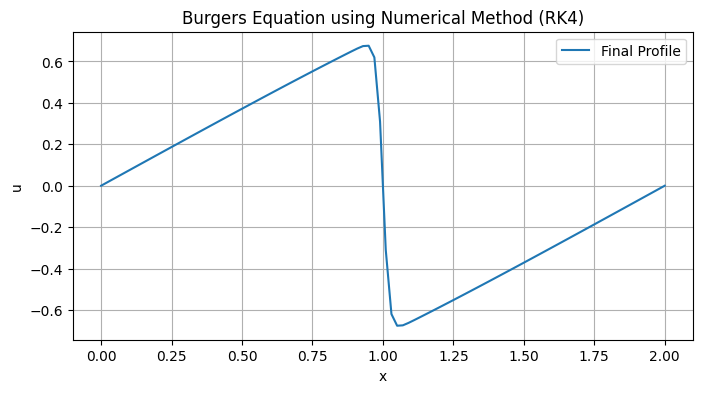

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Parameters
L = 2.0
Nx = 100
dx = L / Nx
dt = 0.001
T = 1.0
Nt = int(T / dt)
nu = 0.01
x = np.linspace(0, L, Nx)

# Initial condition
u = np.sin(np.pi * x)

# Derivatives
def spatial_derivative(u):
    dudx = np.zeros_like(u)
    dudx[1:-1] = (u[2:] - u[:-2]) / (2 * dx)
    dudx[0] = (u[1] - u[0]) / dx
    dudx[-1] = (u[-1] - u[-2]) / dx
    return dudx

def second_derivative(u):
    d2udx2 = np.zeros_like(u)
    d2udx2[1:-1] = (u[2:] - 2 * u[1:-1] + u[:-2]) / dx**2
    return d2udx2

def f(u):
    return -u * spatial_derivative(u) + nu * second_derivative(u)

# RK4 integrator
def rk4_step(u, dt):
    k1 = dt * f(u)
    k2 = dt * f(u + k1 / 2)
    k3 = dt * f(u + k2 / 2)
    k4 = dt * f(u + k3)
    return u + (k1 + 2*k2 + 2*k3 + k4) / 6

# Time evolution
for _ in range(Nt):
    u = rk4_step(u, dt)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x, u, label="Final Profile")
plt.xlabel("x")
plt.ylabel("u")
plt.title("Burgers Equation using Numerical Method (RK4)")
plt.legend()
plt.grid(True)

# ✅ Save and download
filename = "burgers_numerical_solution.png"
plt.savefig(filename, dpi=300)
files.download(filename)

# ✅ Show plot (after saving)
plt.show()


In [ ]:
#